<a href="https://colab.research.google.com/github/sanheensethi/gndcteam/blob/master/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Downloading Dataset
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 7.64 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [ ]:
#copy the data
!cp -R /content/PlantVillage-Dataset/raw /content/

In [ ]:
#Inserting Libraries
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
#Initializing Variables
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/raw/color'
width=256
height=256
depth=3

In [ ]:
#Reading Image as Matrix Function
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
root_dir = listdir(directory_root)
print("Number Of Folders : " + str(len(root_dir)))
image_list,label_list = [],[]

Number Of Folders : 38


In [ ]:
#Loading Images
image_list,label_list = [],[]
print("[INFO] Loading Images ...")
root_dir = listdir(directory_root)
sumP = 0
for directory in root_dir :
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))

[INFO] Loading Images ...
[FOLDER] Loading Folder : Potato___Early_blight
[IMAGES] Images : 1000
[FOLDER] Loading Folder : Corn_(maize)___healthy
[IMAGES] Images : 1162
[FOLDER] Loading Folder : Tomato___Spider_mites Two-spotted_spider_mite
[IMAGES] Images : 1676
[FOLDER] Loading Folder : Cherry_(including_sour)___healthy
[IMAGES] Images : 854
[FOLDER] Loading Folder : Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
[IMAGES] Images : 513
[FOLDER] Loading Folder : Grape___Esca_(Black_Measles)
[IMAGES] Images : 1383
[FOLDER] Loading Folder : Blueberry___healthy
[IMAGES] Images : 1502
[FOLDER] Loading Folder : Raspberry___healthy
[IMAGES] Images : 371
[FOLDER] Loading Folder : Cherry_(including_sour)___Powdery_mildew
[IMAGES] Images : 1052
[FOLDER] Loading Folder : Peach___healthy
[IMAGES] Images : 360
[FOLDER] Loading Folder : Squash___Powdery_mildew
[IMAGES] Images : 1835
[FOLDER] Loading Folder : Grape___Black_rot
[IMAGES] Images : 1180
[FOLDER] Loading Folder : Tomato___Leaf_Mold
[

In [ ]:
dataGeneration = ImageDataGenerator(validation_split=0.2,rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
trainGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(256,256),
        batch_size=32,
        shuffle=True,
        subset='training')

Found 43456 images belonging to 38 classes.


In [ ]:
 validGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(256,256),
        batch_size=32,
        shuffle=True,
        subset='validation')

Found 10849 images belonging to 38 classes.


In [ ]:
model = Sequential()

In [ ]:
inputShape = (256,256,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
n_classes = 38

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same",name="conv_1", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
 model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation_35 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_36 (Activation)   (None, 85, 85, 64)       

In [ ]:
 opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [101]:
 history = model.fit_generator(
    trainGenerator,samples_per_epoch = 3000,nb_epoch = 2,validation_data = validGenerator,nb_val_samples = 500)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=93, epochs=2, validation_steps=500)`
  


Epoch 1/2
93/93 [==============================] - 1920s 21s/step - loss: 0.0828 - accuracy: 0.9764 - val_loss: 0.2079 - val_accuracy: 0.9607
Epoch 2/2
93/93 [==============================] - 1905s 20s/step - loss: 0.0729 - accuracy: 0.9780 - val_loss: 0.1025 - val_accuracy: 0.9760


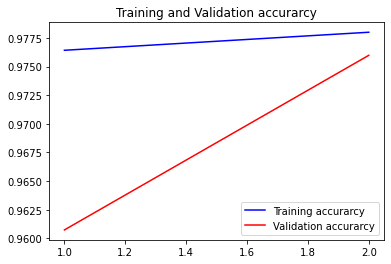

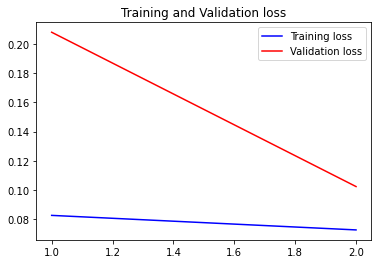

In [104]:
 acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
 
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [108]:
 print("[INFO] Calculating model accuracy")
scores = model.evaluate(validGenerator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
340/340 [==============================] - 835s 2s/step
Test Accuracy: 97.6194977760315


In [109]:
 print("[INFO] Saving model...")
model.save("disease.h5")

[INFO] Saving model...


In [ ]:
#Loading Images
image_list = []
print("[INFO] LOADING Folders...")
start = 0
end = 38
for i in range(start,end):
    print(str(i)+". "+str(root_dir[i]))

[INFO] LOADING Folders...
0. Potato___Early_blight
1. Corn_(maize)___healthy
2. Tomato___Spider_mites Two-spotted_spider_mite
3. Cherry_(including_sour)___healthy
4. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
5. Grape___Esca_(Black_Measles)
6. Blueberry___healthy
7. Raspberry___healthy
8. Cherry_(including_sour)___Powdery_mildew
9. Peach___healthy
10. Squash___Powdery_mildew
11. Grape___Black_rot
12. Tomato___Leaf_Mold
13. Orange___Haunglongbing_(Citrus_greening)
14. Apple___Black_rot
15. Apple___healthy
16. Tomato___Septoria_leaf_spot
17. Pepper,_bell___Bacterial_spot
18. Soybean___healthy
19. Tomato___Late_blight
20. Corn_(maize)___Common_rust_
21. Peach___Bacterial_spot
22. Apple___Cedar_apple_rust
23. Potato___healthy
24. Apple___Apple_scab
25. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
26. Tomato___healthy
27. Tomato___Target_Spot
28. Tomato___Early_blight
29. Strawberry___healthy
30. Potato___Late_blight
31. Corn_(maize)___Northern_Leaf_Blight
32. Strawberry___Leaf_scorch

In [ ]:
GettingDataFolder = [0,2,12,16,19,23,26,27,28,30,35,36,37]

In [ ]:
 for i in GettingDataFolder:    
    print(i)
    directory = root_dir[i]
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    print("[IMAGES] LOADING " + str(len(plant_disease_image_list)) + " Images.")
    for image in plant_disease_image_list :
        image_direc = f"{directory_root}/{directory}/{image}"
        image_list.append(convert_image_to_array(image_direc))
        label_list.append(directory)
print("Total Number Of Images : " + str(len(image_list)))

0
[FOLDER] Loading Folder : Potato___Early_blight
[IMAGES] LOADING 1000 Images.
2
[FOLDER] Loading Folder : Tomato___Spider_mites Two-spotted_spider_mite
[IMAGES] LOADING 1676 Images.
12
[FOLDER] Loading Folder : Tomato___Leaf_Mold
[IMAGES] LOADING 952 Images.
16
[FOLDER] Loading Folder : Tomato___Septoria_leaf_spot
[IMAGES] LOADING 1771 Images.
19
[FOLDER] Loading Folder : Tomato___Late_blight
[IMAGES] LOADING 1909 Images.
23
[FOLDER] Loading Folder : Potato___healthy
[IMAGES] LOADING 152 Images.
26
[FOLDER] Loading Folder : Tomato___healthy
[IMAGES] LOADING 1591 Images.
27
[FOLDER] Loading Folder : Tomato___Target_Spot
[IMAGES] LOADING 1404 Images.
28
[FOLDER] Loading Folder : Tomato___Early_blight
[IMAGES] LOADING 1000 Images.
30
[FOLDER] Loading Folder : Potato___Late_blight
[IMAGES] LOADING 1000 Images.
35
[FOLDER] Loading Folder : Tomato___Tomato_Yellow_Leaf_Curl_Virus
[IMAGES] LOADING 5357 Images.


In [ ]:
 #Loading Images
print("[INFO] LOADING Folders...")
start = 3
end = 6
for i in range(start,end):
    directory = root_dir[i]
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    print("[IMAGES] LOADING " + str(len(plant_disease_image_list)) + " Images.")
    for image in plant_disease_image_list :
        image_direc = f"{directory_root}/{directory}/{image}"
        image_list.append(convert_image_to_array(image_direc))
        label_list.append(directory)
print("Total Number Of Images : " + str(len(image_list)))

[INFO] LOADING Folders...
[FOLDER] Loading Folder : Corn_(maize)___healthy
[IMAGES] LOADING 1162 Images.
[FOLDER] Loading Folder : Strawberry___healthy
[IMAGES] LOADING 456 Images.
[FOLDER] Loading Folder : Pepper,_bell___Bacterial_spot
[IMAGES] LOADING 997 Images.
Total Number Of Images : 8932


In [ ]:
#Loading Images
print("[INFO] LOADING Folders...")
start = 6
end = 9
for i in range(start,end):
    directory = root_dir[i]
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    print("[IMAGES] LOADING " + str(len(plant_disease_image_list)) + " Images.")
    for image in plant_disease_image_list :
        image_direc = f"{directory_root}/{directory}/{image}"
        image_list.append(convert_image_to_array(image_direc))
        label_list.append(directory)
print("Total Number Of Images : " + str(len(image_list)))

[INFO] LOADING Folders...
[FOLDER] Loading Folder : Blueberry___healthy
[IMAGES] LOADING 1502 Images.
[FOLDER] Loading Folder : Raspberry___healthy
[IMAGES] LOADING 371 Images.
[FOLDER] Loading Folder : Cherry_(including_sour)___Powdery_mildew
[IMAGES] LOADING 1052 Images.
Total Number Of Images : 9513


In [ ]:
 #Loading Images
print("[INFO] LOADING Folders...")
start = 9
end = 12
for i in range(start,end):
    directory = root_dir[i]
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    print("[IMAGES] LOADING " + str(len(plant_disease_image_list)) + " Images.")
    for image in plant_disease_image_list :
        image_direc = f"{directory_root}/{directory}/{image}"
        image_list.append(convert_image_to_array(image_direc))
        label_list.append(directory)
print("Total Number Of Images : " + str(len(image_list)))

[INFO] LOADING Folders...
[FOLDER] Loading Folder : Peach___healthy
[IMAGES] LOADING 360 Images.
[FOLDER] Loading Folder : Squash___Powdery_mildew
[IMAGES] LOADING 1835 Images.
[FOLDER] Loading Folder : Grape___Black_rot
[IMAGES] LOADING 1180 Images.
Total Number Of Images : 12888


In [ ]:
 #Loading Images
print("[INFO] LOADING Folders...")
start = 12
end = 15
for i in range(start,end):
    directory = root_dir[i]
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    print("[IMAGES] LOADING " + str(len(plant_disease_image_list)) + " Images.")
    for image in plant_disease_image_list :
        image_direc = f"{directory_root}/{directory}/{image}"
        image_list.append(convert_image_to_array(image_direc))
        label_list.append(directory)
print("Total Number Of Images : " + str(len(image_list)))

[INFO] LOADING Folders...
[FOLDER] Loading Folder : Tomato___Leaf_Mold
[IMAGES] LOADING 952 Images.
[FOLDER] Loading Folder : Orange___Haunglongbing_(Citrus_greening)
[IMAGES] LOADING 5507 Images.
